/home/ubuntu/anaconda3/envs/imgdesc_tf2/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Generating caption for 1.jpg
test2
BEAM Search with k= 3
A group of young women in white shirts and white shirts are standing in front of a wedding party.


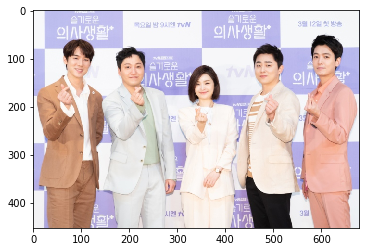

In [13]:
import numpy as np
from PIL import Image
from pickle import load
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from utils.model import CNNModel, generate_caption_beam_search
import os
from googletrans import Translator

from config import config

"""
    *Some simple checking
"""
assert type(config['max_length']) is int, 'Please provide an integer value for `max_length` parameter in config.py file'
assert type(config['beam_search_k']) is int, 'Please provide an integer value for `beam_search_k` parameter in config.py file'

# Extract features from each image in the directory
def extract_features(filename, model, model_type):
	if model_type == 'inceptionv3':
		from keras.applications.inception_v3 import preprocess_input
		target_size = (299, 299)
	elif model_type == 'vgg16':
		from keras.applications.vgg16 import preprocess_input
		target_size = (224, 224)
	# Loading and resizing image
	try: image = load_img(filename, target_size=target_size)
	except: return []
	# Convert the image pixels to a numpy array
	image = img_to_array(image)
	# Reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# Prepare the image for the CNN Model model
	image = preprocess_input(image)
	# Pass image into model to get encoded features
	features = model.predict(image, verbose=0)
	return features

# Load the tokenizer
tokenizer_path = config['tokenizer_path']
tokenizer = load(open(tokenizer_path, 'rb'))

# Max sequence length (from training)
max_length = config['max_length']

# Load the model
caption_model = load_model(config['model_load_path'])

image_model = CNNModel(config['model_type'])

# Load and prepare the image
image_file = '1.jpg'
if(image_file.split('.')[1]=='jpg' or image_file.split('.')[1]=='jpeg'):
	print('Generating caption for {}'.format(image_file))
	# Encode image using CNN Model
	image = extract_features(config['test_data_path']+image_file, image_model, config['model_type'])
	if len(image) == 0 : 
		print(config['errmsg_imgopen'])
	# Generate caption using Decoder RNN Model + BEAM search
	generated_caption = generate_caption_beam_search(caption_model, tokenizer, image, max_length, beam_index=config['beam_search_k'])
	# Remove startseq and endseq
	desc_en = generated_caption.split()[1].capitalize()
	for x in generated_caption.split()[2:len(generated_caption.split())-1]:
		desc_en = desc_en + ' ' + x
	desc_en += '.'
	
	# Show image and its caption
	pil_im = Image.open(config['test_data_path']+image_file, 'r')
	plt.imshow(pil_im)
	print('test2')
	plt.imshow(np.asarray(pil_im), interpolation='nearest')
	print('BEAM Search with k=',config['beam_search_k'])
	print(desc_en)
#	print(desc_ko,'\n\n')
else : print(config['errmsg_imgopen'])

In [8]:
import os
import sys
import urllib.request
client_id = "9eIZqLhZraxAoH9VlCNL" # 개발자센터에서 발급받은 Client ID 값
client_secret = "DtPF330iLN" # 개발자센터에서 발급받은 Client Secret 값
encText = urllib.parse.quote("A little girl is sitting on a red slide.")
data = "source=en&target=ko&text=" + encText
url = "https://openapi.naver.com/v1/papago/n2mt"
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request, data=data.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{"message":{"@type":"response","@service":"naverservice.nmt.proxy","@version":"1.0.0","result":{"srcLangType":"en","tarLangType":"ko","translatedText":"어린 소녀가 빨간 미끄럼틀에 앉아 있다.","engineType":"N2MT","pivot":null}}}
